# Chapter 9: Practice Exercises with Solutions
---

**Exercise 1:** The Child Health and Development Studies investigate a range of topics. One study considered all pregnancies between 1960 and 1967 among women in the Kaiser Foundation Health Plan in the San Francisco East Bay area. Variables in this study are as follows:
- **response variable:** birth weight in ounces (`bwt`)
- length of pregnancy in days (`gestation`)
- mother's age in years (`age`)
- mother's height in inches (`height`)
- mother's pregnancy weight in pounds (`weight`)
- mother's `smoke` status: 1 if the mother is a smoker, 0 otherwise
- child's `parity` status: 1 if first child, 0 otherwise

Below are three observations from this data set.

| id | bwt | gestation  | parity |  age | height | weight | smoke |
|------|------|------|------|------|------|------|------|
|  1  | 120  | 284  | 0 | 27 | 62 | 100 | 0 |
|   2 | 113    | 282| 0|  33| 64 | 135 | 0 |
|   . | .    | .| . |  . | . | . | . |
|   . | .    | .| . |  . | . | . | . |
|   . | .    | .| . |  . | . | . | . |
|   1236  | 117   | 297| 0| 38 | 65 | 129 | 0 |
 

The summary table below shows the results of a regression model for predicting the birth weight of
babies (`bwt`) based on all of the variables included in the dataset.

| - | Estimate | Std. Error   | t value | Pr(>abs(t)) |
|------|------|------|------|------|
|  (Intercept)  | -80.41  | 14.35   | -5.60 | 0.0000 |
|   gestation  | 0.44    | 0.03| 15.26 |  0.0000 | 
|   parity | -3.33    | 1.13| -2.95 |  0.0033 | 
|   age  | -0.01    | 0.09| -0.10|  0.9170 | 
|   height  | 1.15    | 0.21| 5.63 |  0.0000 | 
|   weight  | 0.05    | 0.03| 1.99 |  0.0471 | 
|   smoke  | -8.40    | 0.95| -8.81 |  0.0000 | 

(A) Write the equation of the regression model that includes all of the variables.

(B) Interpret the slopes of `gestation` and `age` in this context.

(C) Calculate the residual for the first observation in the data set.

(D)  Is there a statistically significant relationship between `bwt` and `smoke`?

(E) The variance of the residuals is 249.28 and the variance of the birth weights of all babies in the dataset is 332.57. Calculate the R-squared and the adjusted R-squared values. Note that there are 1,236 observations in the dataset.

**Answers:**

(A) $\hat{bwt}$ = -80.41 + 0.44 $gestation$ + (-3.33) $parity$ + (-0.01) $age$ + 1.15 x $height$ + 0.05 $weight$ + (-8.40) $smoke$

(B) 

$gestation$ -> The model predicts a 0.44 ounce increase in the birth weight of the baby for each additional day in length of pregnancy, all else held constant.
    
$age$ -> The model predicts a 0.01 ounce decrease in the birth weight of the baby for each additional year in mother's age, all else held constant.

(C) 

$\hat{bwt}$ = -80.41 + 0.44x284 + (-3.33)x0 + (-0.01)x27 + 1.15x62 + 0.05x100 + (-8.40)x0 = 120.58
    
residual = $e$ = $bwt$ - $\hat{bwt}$ = 120 - 120.58 = -0.58

(D) The question is asking whether any relationship exists between smoking and birth weight, 
    which requires a two-sided alternative. 
    $T$ = -8.81, and the p-value is approximately 0. 
    Since p-value is very small, we reject $Ho$. 
    We can say that there is a statistically significant relationship between birth weight and smoking.

(E) 

$R^2$ = 1 - (249.28/332.57) = 0.2504
    
$R^2_{adj}$ = 1 - ((249.28/(1236-6-1))/(332.57/(1236-1))) = 0.2468

---
## Baseball Player Statistics (MLB11)

The movie [Moneyball](https://www.imdb.com/title/tt1210166/) focuses on the "quest for the secret of success in baseball". It follows a low-budget team, the Oakland Athletics, who believed that under-used statistics, such as a player's ability to get on base, better predict the ability to score runs than typical statistics like home runs, RBIs (runs batted in), and batting average. Obtaining players who excelled in these under-used statistics turned out to be much more affordable for the team.

Data Source: https://www.mlb.com/

The data set is available as a CSV file named `mlb11.csv` (Download from [here](https://raw.githubusercontent.com/imranture/practice_stats/main/datasets/mlb11.csv)).

In [1]:
import pandas as pd

mlb11 = pd.read_csv('datasets/mlb11.csv')

print(f'Data shape = {mlb11.shape}')
mlb11.head()

Data shape = (30, 12)


,team,runs,at_bats,hits,homeruns,bat_avg,strikeouts,stolen_bases,wins,new_onbase,new_slug,new_obs
0,Texas Rangers,855,5659,1599,210,0.283,930,143,96,0.340,0.460,0.800
1,Boston Red Sox,875,5710,1600,203,0.280,1108,102,90,0.349,0.461,0.810
2,Detroit Tigers,787,5563,1540,169,0.277,1143,49,95,0.340,0.434,0.773
3,Kansas City Royals,730,5672,1560,129,0.275,1006,153,71,0.329,0.415,0.744
4,St. Louis Cardinals,762,5532,1513,162,0.273,978,57,90,0.341,0.425,0.766


---
**Exercise 2:** Plot pairwise relationships among `runs`, `hits`, `bat_avg` and `wins`.

**Hint**: Use seaborn's [`pairplot()`](https://seaborn.pydata.org/generated/seaborn.pairplot.html) function.

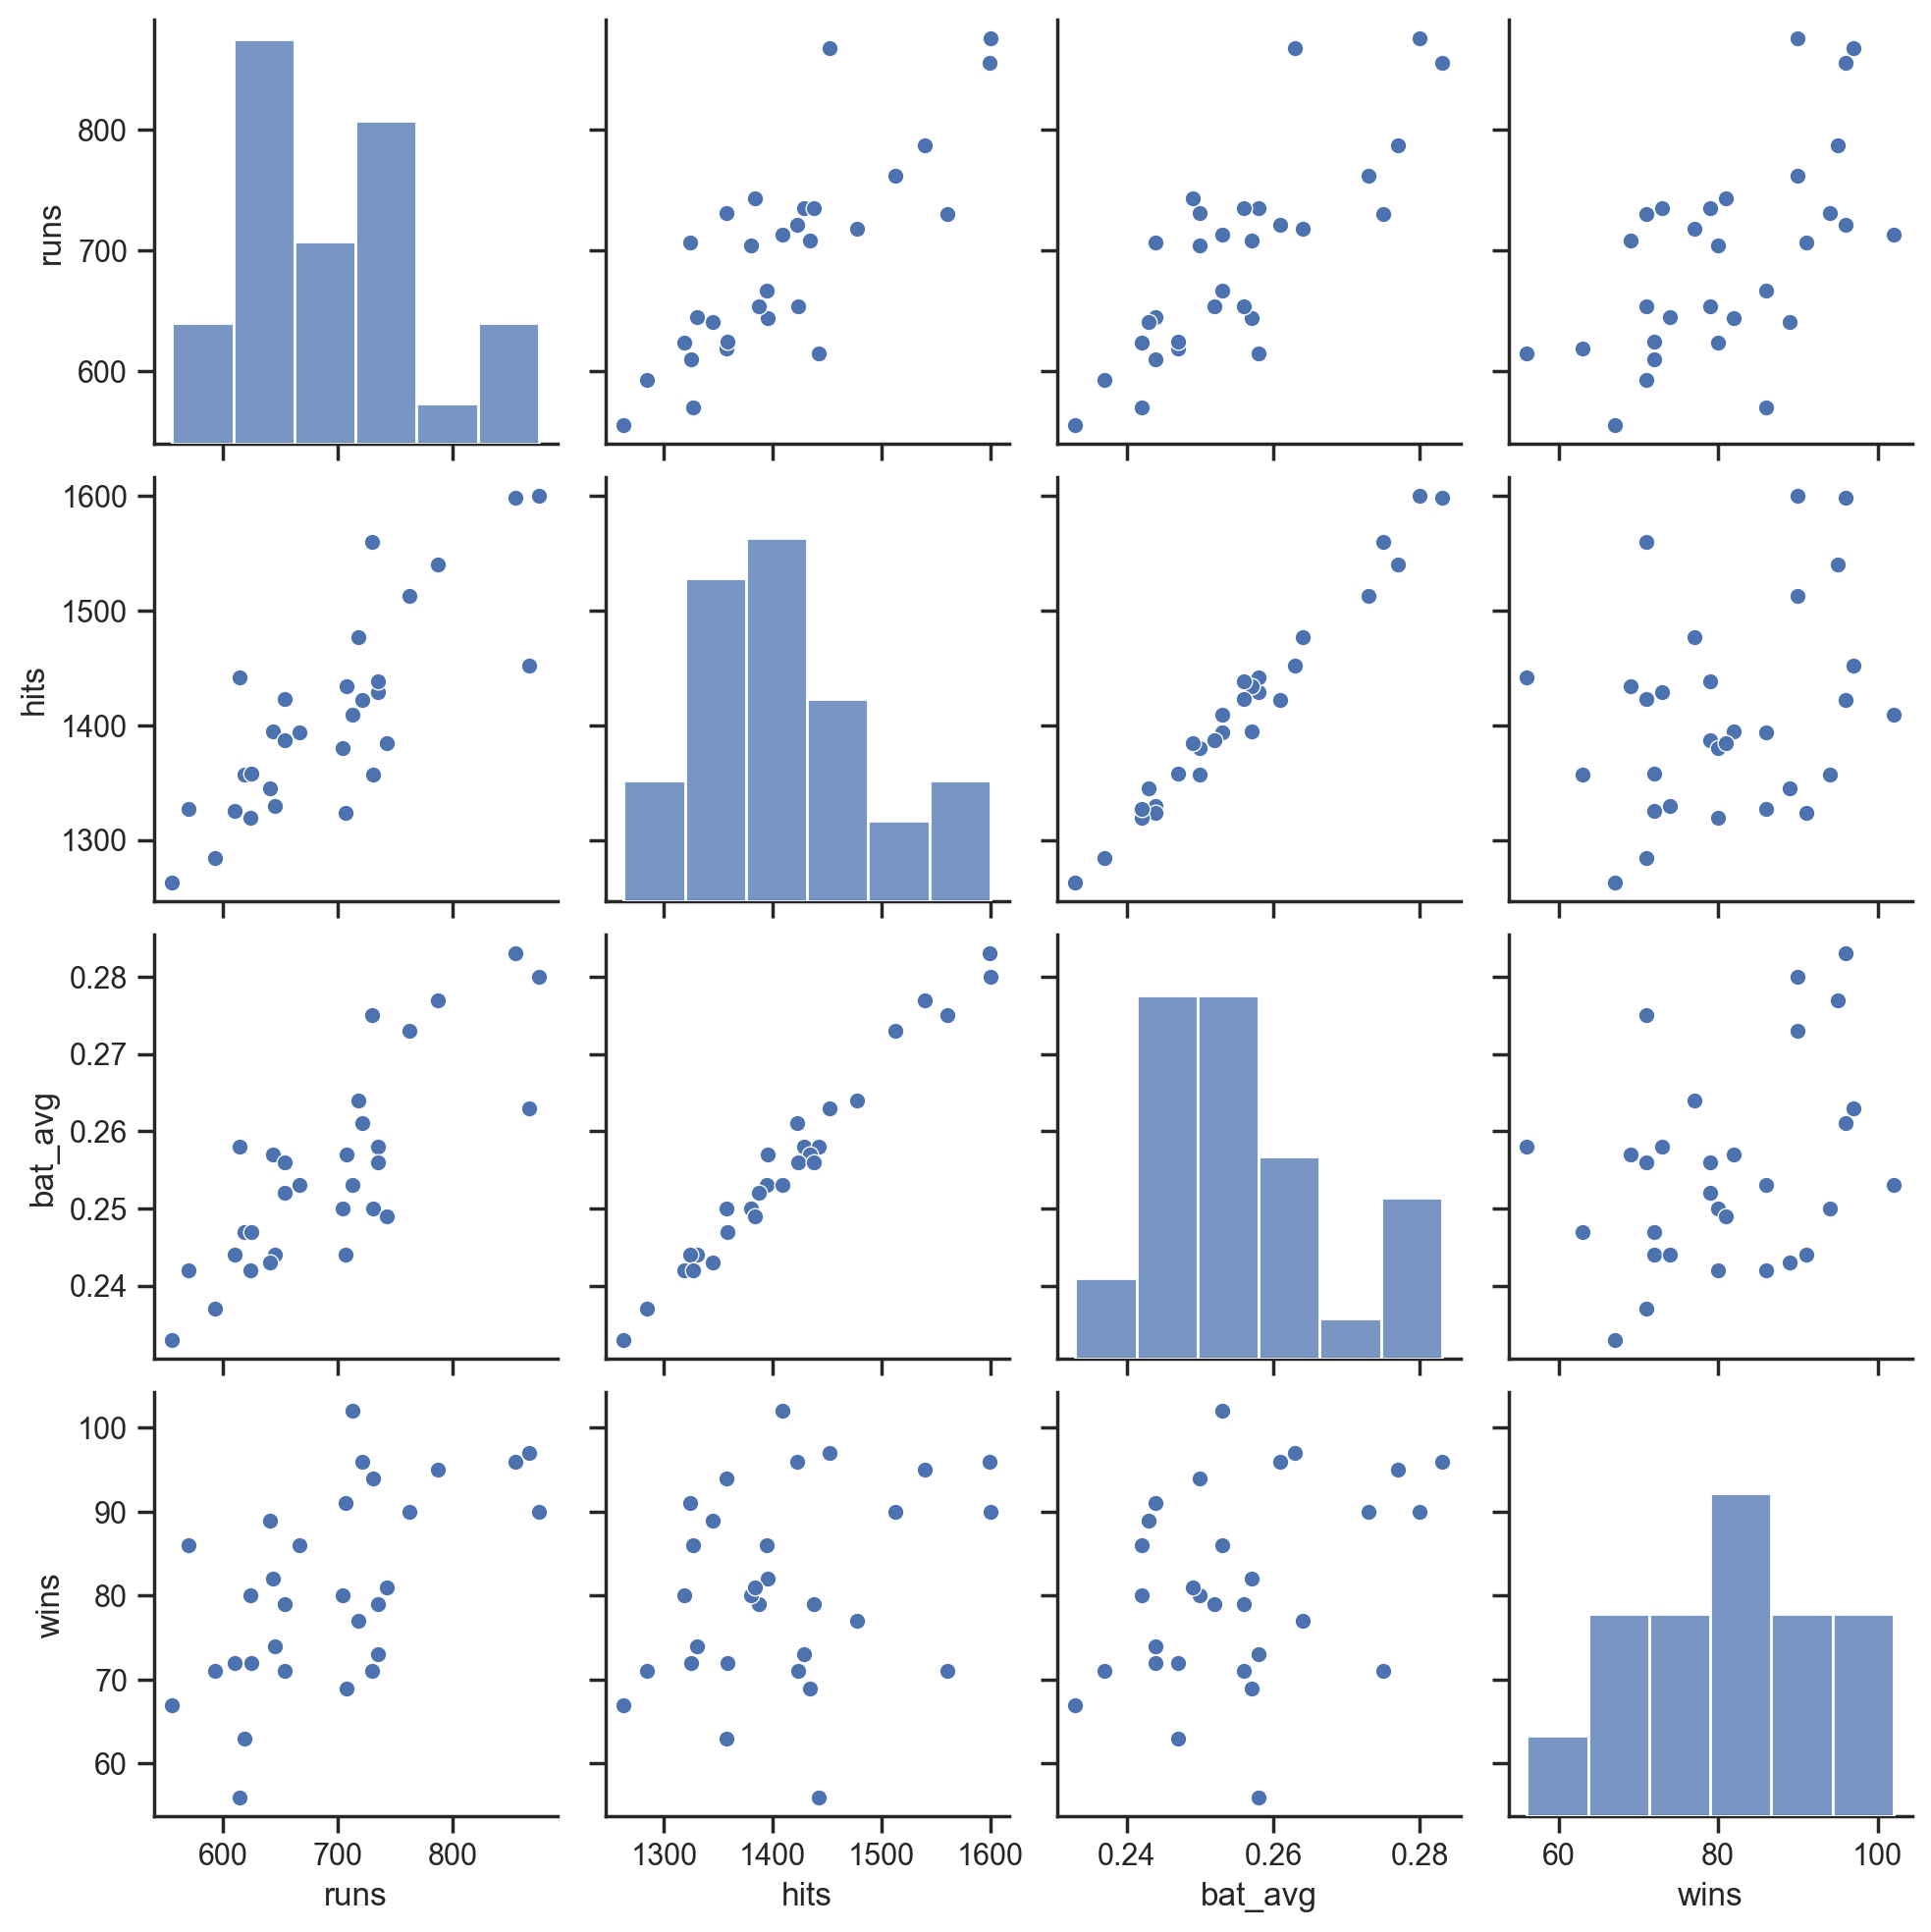

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'
import seaborn as sns

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (10,5)

sns.set(style="ticks", color_codes = True)

sns.pairplot(mlb11, vars = ['runs', 'hits', 'bat_avg', 'wins'])
plt.show();

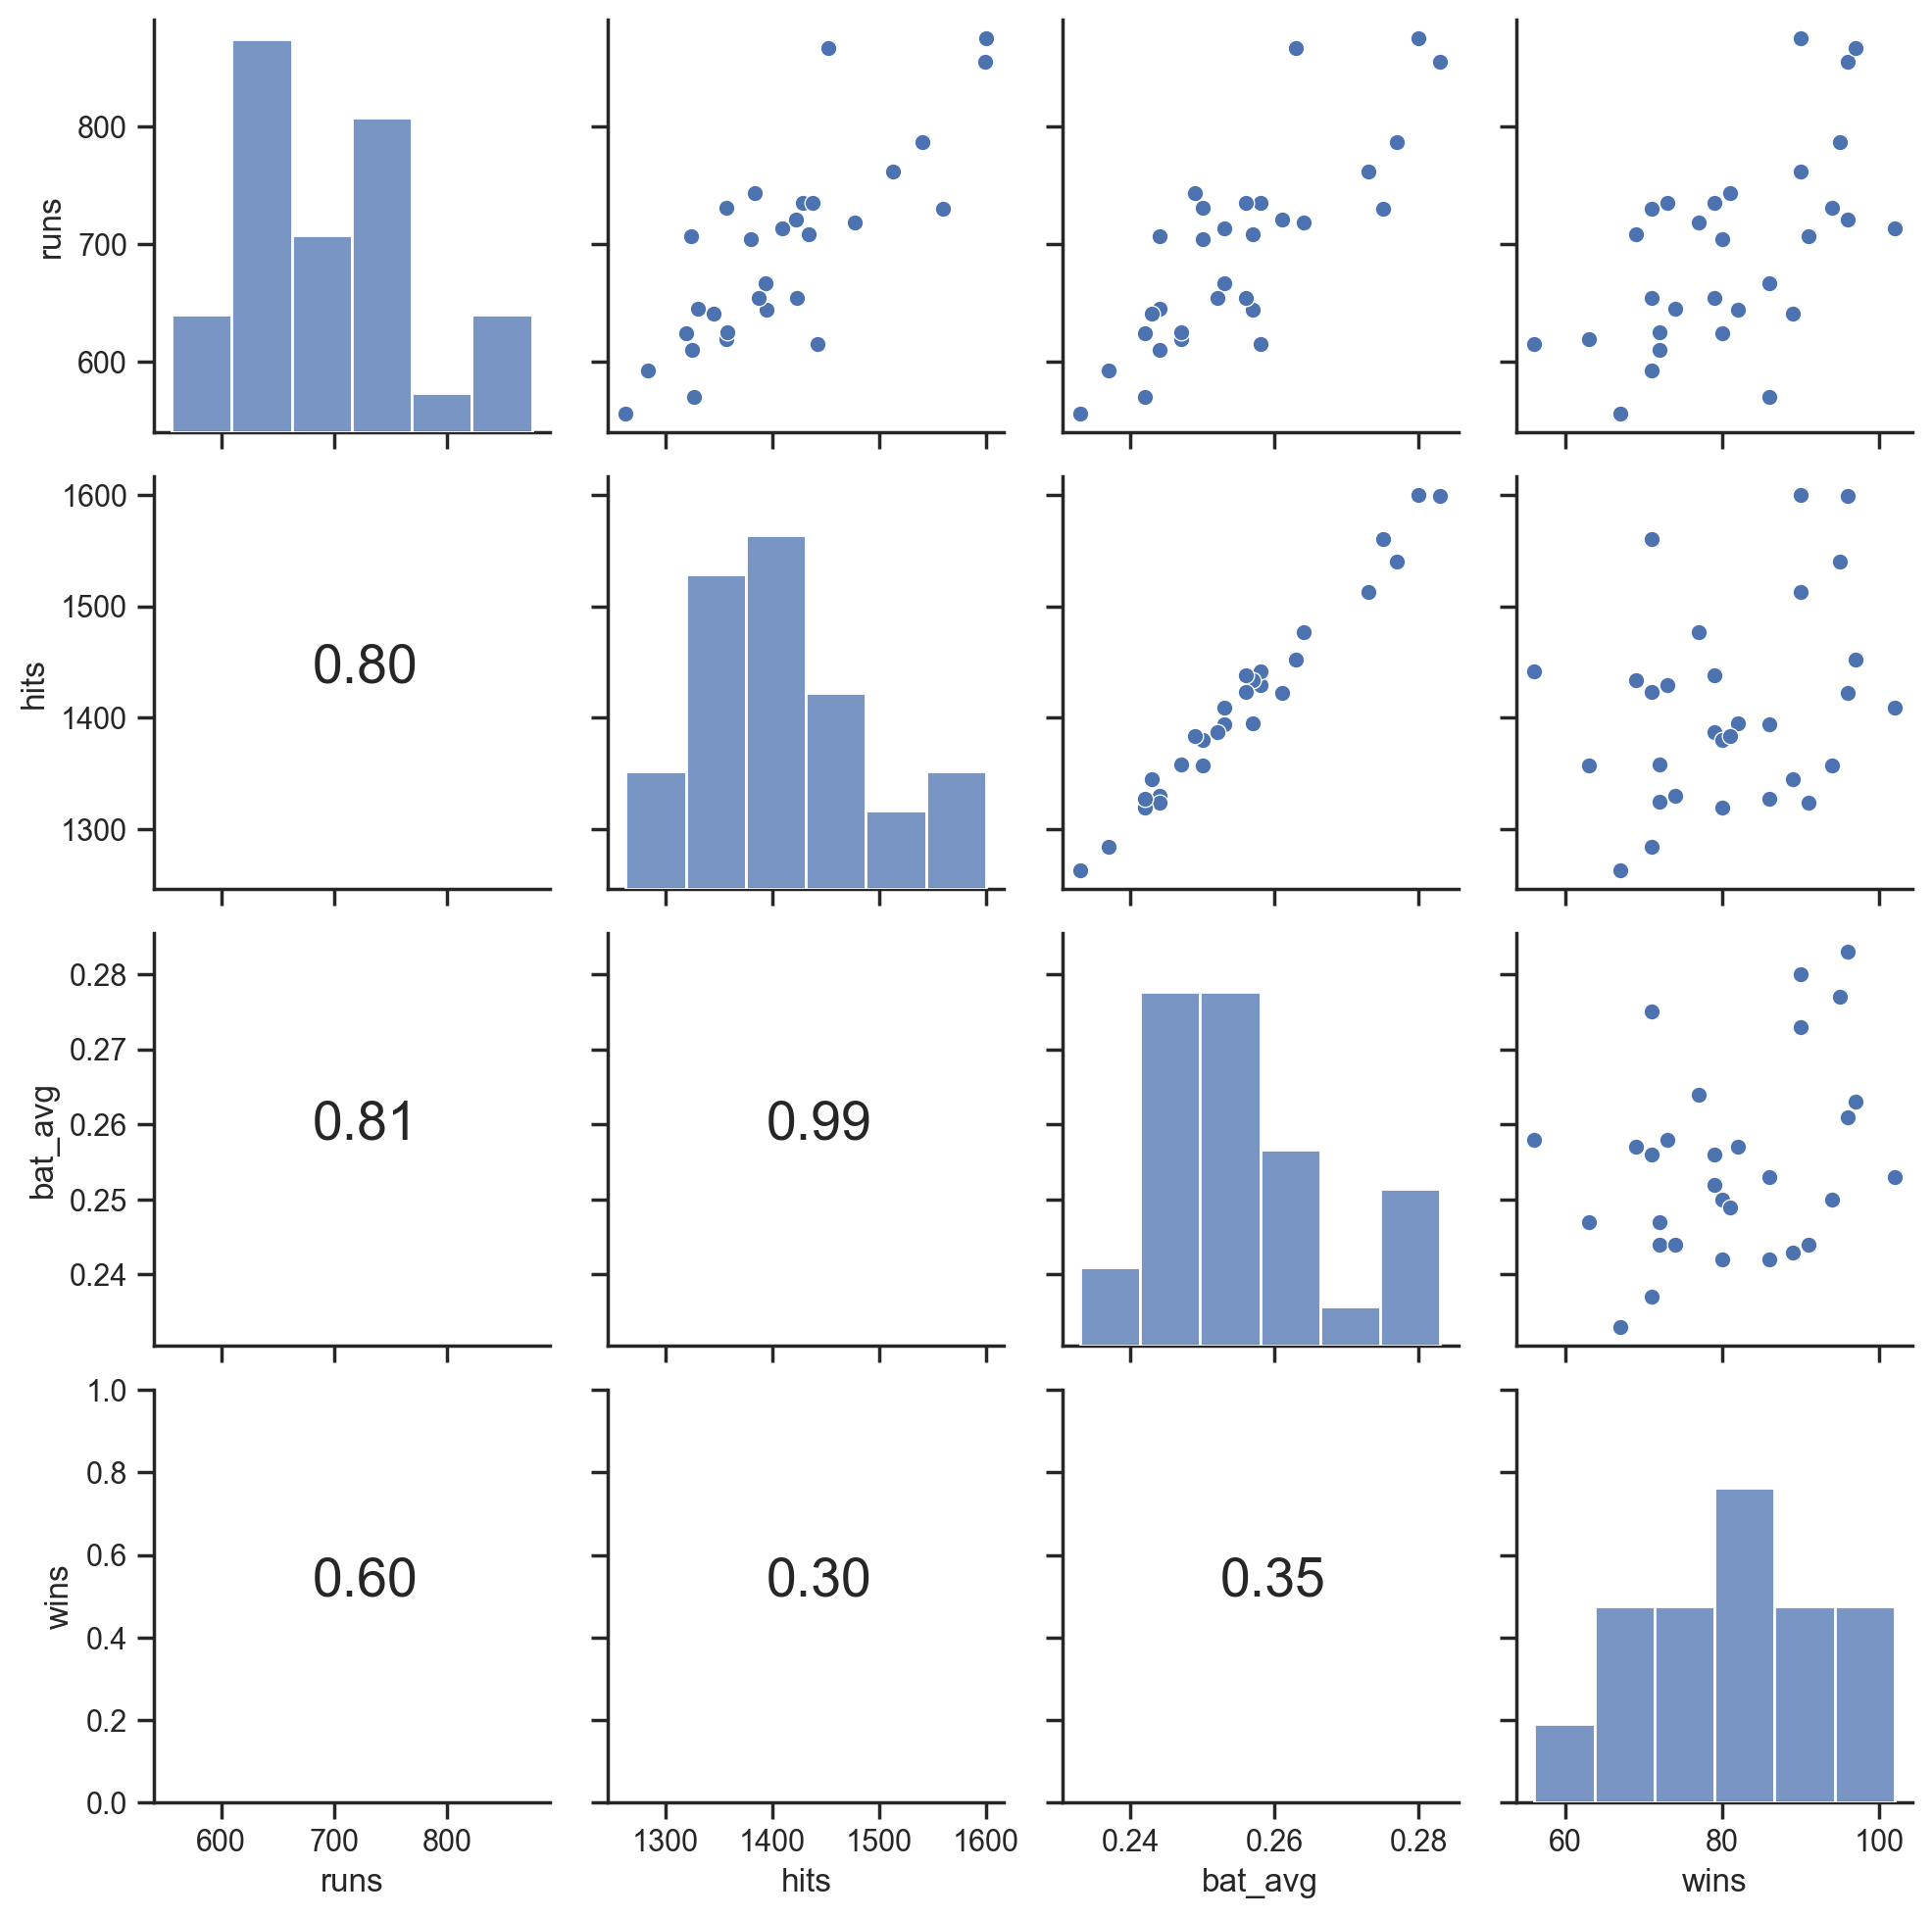

In [3]:
# Add correlation coefficients to the plot above 

import scipy.stats as stats

def corrfunc(x, y, **kws):
    r, _ = stats.pearsonr(x, y)
    ax = plt.gca()
    ax.annotate('{:.2f}'.format(r),
                xy=(.4, .5), xycoords=ax.transAxes, fontsize=20)

# Assuming mlb11 is already defined and contains the required data
g = sns.PairGrid(mlb11, vars=['runs', 'hits', 'bat_avg', 'wins'])
g.map_upper(sns.scatterplot)
g.map_lower(corrfunc)
g.map_diag(sns.histplot, kde=False)  # Using histplot instead of distplot
plt.show()


---
**Exercise 3:** Construct a multiple regression model for `runs` as the response (dependent) variable and `bat_avg`, `wins`, `strikeouts` as the independent variables. Compute R-squared and Adjusted R-squared values.

**Hint**: Use [`statsmodels.api`](https://www.statsmodels.org/stable/regression.html) to fit the model.

In [4]:
import statsmodels.api as sm

formula_string = "runs ~ bat_avg + wins + strikeouts"

model = sm.formula.ols(formula = formula_string, data = mlb11)
model_fitted = model.fit()
print(model_fitted.summary())

                            OLS Regression Results                            
Dep. Variable:                   runs   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.773
Method:                 Least Squares   F-statistic:                     33.86
Date:                Sun, 16 Jun 2024   Prob (F-statistic):           3.94e-09
Time:                        17:36:54   Log-Likelihood:                -150.58
No. Observations:                  30   AIC:                             309.2
Df Residuals:                      26   BIC:                             314.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1046.3114    265.290     -3.944      0.0

In [5]:
print(f'R-squared = {model_fitted.rsquared:.4f}')
print(f'Adj. R-squared = {model_fitted.rsquared_adj:.4f}')

R-squared = 0.7962
Adj. R-squared = 0.7727


---
**Exercise 4:** Construct a multiple regression model for `runs` as dependent variable again, but this time include all the independent variables (except `team`) in the model. Compute R-squared and Adjusted R-squared values again.

In [6]:
import statsmodels.api as sm

# long way
formula_string = 'runs ~ at_bats + hits + homeruns + bat_avg + strikeouts + stolen_bases + wins + new_onbase + new_slug + new_obs'
print('formula_string - long way:', formula_string)

# short and sweet way using Python string tricks
formula_string_indep_vars = ' + '.join(mlb11.drop(columns=['runs', 'team']).columns)
formula_string = 'runs ~ ' + formula_string_indep_vars
print('formula_string - short way:', formula_string)

model_full = sm.formula.ols(formula = formula_string , data = mlb11)
model_full_fitted = model_full.fit()
print(model_full_fitted.summary())

formula_string - long way: runs ~ at_bats + hits + homeruns + bat_avg + strikeouts + stolen_bases + wins + new_onbase + new_slug + new_obs
formula_string - short way: runs ~ at_bats + hits + homeruns + bat_avg + strikeouts + stolen_bases + wins + new_onbase + new_slug + new_obs
                            OLS Regression Results                            
Dep. Variable:                   runs   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     49.67
Date:                Sun, 16 Jun 2024   Prob (F-statistic):           1.78e-11
Time:                        17:36:54   Log-Likelihood:                -124.92
No. Observations:                  30   AIC:                             271.8
Df Residuals:                      19   BIC:                             287.3
Df Model:                          10                                         
Covariance

In [7]:
print(f'R-squared = {model_full_fitted.rsquared:.4f}')
print(f'Adj. R-squared = {model_full_fitted.rsquared_adj:.4f}')

R-squared = 0.9632
Adj. R-squared = 0.9438
